In [113]:
xdim=25067.525
ydim=xdim
width=721*xdim
halfwidth=width/2.
bmap_width=18019900.710751273 #boundinglat=0.00000001
print(width)
ulxmap=9024309
print('full width ulx: ',ulxmap*2)
print('full width meters: ',width)
print(bmap_width)

18073685.525000002
full width ulx:  18048618
full width meters:  18073685.525000002
18019900.710751273


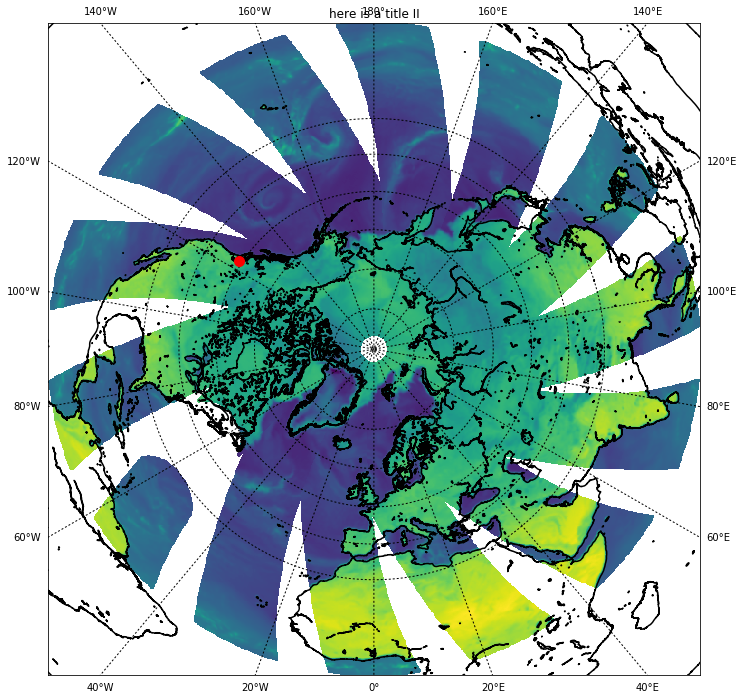

In [156]:
# %load temp.md
%matplotlib inline
import glob
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.basemap import Basemap
from rasterio.transform import from_bounds
from pyresample import kd_tree,image, geometry

file_list = glob.glob('EASE*')
data_dict={}
for a_file in file_list:
    with open(a_file,'rb') as infile:
        if a_file.find('NH') > -1:
            continue
        if a_file.find('TIM') > -1:
            continue
        the_bytes=infile.read()
        the_string=bytearray(the_bytes)
        the_array=np.frombuffer(the_string,dtype=np.uint16)
        the_array.shape=[721,721]
        the_array=the_array.astype(np.float32)
        the_array=the_array/10.
        data_dict[a_file]=the_array

file_list=list(data_dict.keys())
plt.close('all')
fig,ax=plt.subplots(1,1,figsize=(12,12))
#width=18004168.537
# width=18018328.124871105
# width=18019900.710751273
width=18019900.72490407
#width=ulxmap*2
cornerx=9024309
cornery=cornerx
basemap_args=dict(epsg=3408,width=width,height=width,ax=ax,resolution='i')
#basemap_args=dict(width=width,height=width,ax=ax,resolution='i')
crs={'lat_0': 90.0,
     'lon_0': 0.0,
     'projection': 'laea',
     'rsphere':6371228
    }
basemap_args.update(crs)
bmap=Basemap(**basemap_args)
#bmap=Basemap(rsphere=[6371228.0,6371228.0],boundinglat=60,proj='nplaea',units='m',width=10000,height=10000,ax=ax,resolution='l')
temps=data_dict[file_list[0]]
masked_temps=np.ma.masked_where(temps < 50.,temps)
height,width=masked_temps.shape
orig_transform = from_bounds(bmap.llcrnrx,bmap.llcrnry,
                             bmap.urcrnrx,bmap.urcrnry,width,height)
from e582lib.map_slices import make_xy
xvals,yvals=make_xy(0,height,0,width,orig_transform)
bmap.pcolormesh(xvals,yvals,masked_temps)
#bmap.imshow(masked_temps,origin='upper')
van_lon,van_lat = [-123.1207,49.2827]
van_x,van_y=bmap(van_lon,van_lat)
bmap.plot(van_x,van_y,'ro',markersize=10,zorder=5)
lat_sep,lon_sep= 10,20
parallels = np.arange(30, 90, lat_sep)
meridians = np.arange(-180, 180, lon_sep)
bmap.drawparallels(parallels, labels=[1, 1, 1, 1],
                       fontsize=10, latmax=70)
bmap.drawmeridians(meridians, labels=[1, 1, 1, 1],
                       fontsize=10, latmax=90)
bmap.drawcoastlines(linewidth=1.5, linestyle='solid', color='k',zorder=2)
ax.set_title('here is a title II');

In [145]:
orig_crs=dict(init='epsg:3408')
#http://nsidc.org/data/gis/headers/NL.hdr
cornerx=9024309  #meters
cornerx=cornery
orig_extent=[-cornerx,-cornery,cornerx,cornery]
new_extent=[-cornerx/2.,-cornery/2.,cornerx/2.,cornery/2.]
new_crs=orig_crs

8716037.228269622

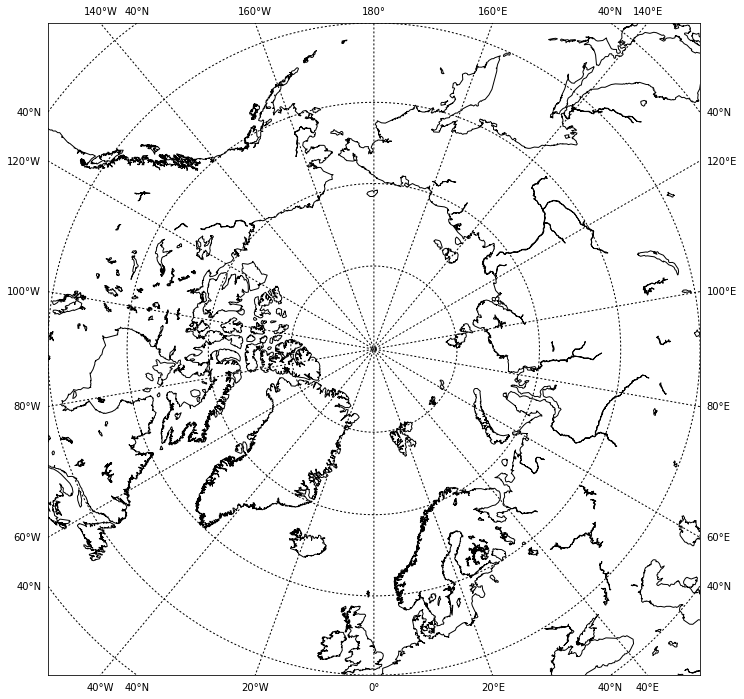

In [143]:
fig,ax=plt.subplots(1,1,figsize=(12,12))        
#bmap=Basemap(epsg=3408,projection='nplaea',width=70000,height=70000,ax=ax,resolution='l',boundinglat=60,lon_0=0)
bmap=Basemap(epsg=3408,width=cornerx,height=cornery,ax=ax,resolution='l')
bmap_new=Basemap(projection='nplaea',ax=ax,resolution='l',boundinglat=50,lon_0=0)
bmap_new.drawcoastlines()
bmap_new.drawparallels(parallels, labels=[1, 1, 1, 1],
                       fontsize=10, latmax=70)
bmap_new.drawmeridians(meridians, labels=[1, 1, 1, 1],
                       fontsize=10, latmax=90);
bmap_new.proj4string
#bmap.drawcontinents()
bmap_new.urcrnrx

In [138]:
bmap_new.urcrnry

8716037.228269622

In [109]:
# new_transform = from_bounds(bmap_new.llcrnrx,bmap_new.llcrnry,
#                             bmap_new.urcrnrx,bmap_new.urcrnry,width,height)
# new_crs=bmap_new.projparams
# new_extent=[bmap_new.llcrnrx,bmap_new.llcrnry,
#               bmap_new.urcrnrx,bmap_new.urcrnry]

In [146]:
orig_image = masked_temps
from_def = geometry.AreaDefinition('orig', 'orig image', 'area_orig',
                               orig_crs,
                               721, 721,
                               orig_extent)
to_def = geometry.AreaDefinition('big', 'big image','area_big',
                               new_crs,
                               300,300,
                               new_extent)

from_nn = image.ImageContainerNearest(masked_temps,from_def, 
                                      radius_of_influence=18000,fill_value=None)
to_nn = from_nn.resample(to_def)
result_data_nn = to_nn.image_data        
        
        

In [114]:
new_crs

{'R': 6370997.0,
 'lat_0': 90.0,
 'lon_0': 0.0,
 'proj': 'laea',
 'units': 'm',
 'x_0': 4358018.61413481,
 'y_0': 4358018.614134811}

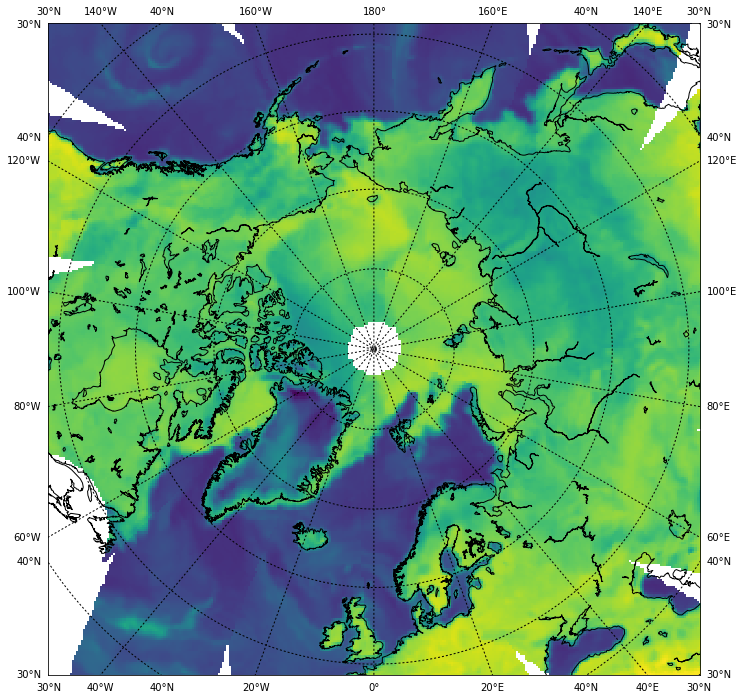

In [152]:
fig,ax=plt.subplots(1,1,figsize=(12,12))
basemap_args=dict(epsg=3408,ax=ax,resolution='l',width=cornerx,height=cornery)
bmap=Basemap(**basemap_args)
bmap.imshow(result_data_nn,origin='upper')
bmap.drawparallels(parallels, labels=[1, 1, 1, 1],
                       fontsize=10, latmax=70)
bmap.drawmeridians(meridians, labels=[1, 1, 1, 1],
                       fontsize=10, latmax=90);
bmap.drawcoastlines();

In [107]:
bmap_new.projparams

{'R': 6370997.0,
 'lat_0': 90.0,
 'lon_0': 0.0,
 'proj': 'laea',
 'units': 'm',
 'x_0': 4358018.61413481,
 'y_0': 4358018.614134811}